# Random Forest  Regression 

## Importing packages and data

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
# importing data

In [3]:
data_for_model=pickle.load(open(r"C:\Users\12176\Desktop\lab\Data science\5. Machine_learning\2. Datasets/abc_reg_modelling.p", "rb"))
data_for_model.head()

,customer_id,distance_from_store,gender,credit_score,customer_loyalty_score,toatl_sales_cost,num_items,transactions_id,product_area_id,average_basket_value
0,74,3.38,F,0.59,0.263,2563.71,297,44,5,58.266136
1,524,4.76,F,0.52,0.298,2996.02,357,49,5,61.143265
2,607,4.45,F,0.49,0.337,2853.82,350,49,5,58.241224
3,343,0.91,M,0.54,0.873,2388.31,272,54,5,44.227963
4,322,3.02,F,0.63,0.350,2401.64,278,50,5,48.032800


In [4]:
data_for_model.drop(["customer_id"], axis=1, inplace =True)
data_for_model.head()

,distance_from_store,gender,credit_score,customer_loyalty_score,toatl_sales_cost,num_items,transactions_id,product_area_id,average_basket_value
0,3.38,F,0.59,0.263,2563.71,297,44,5,58.266136
1,4.76,F,0.52,0.298,2996.02,357,49,5,61.143265
2,4.45,F,0.49,0.337,2853.82,350,49,5,58.241224
3,0.91,M,0.54,0.873,2388.31,272,54,5,44.227963
4,3.02,F,0.63,0.350,2401.64,278,50,5,48.032800


## Exploratory Data Analysis

In [5]:
## check the dataset information
data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 869
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   distance_from_store     398 non-null    float64
 1   gender                  397 non-null    object 
 2   credit_score            398 non-null    float64
 3   customer_loyalty_score  400 non-null    float64
 4   toatl_sales_cost        400 non-null    float64
 5   num_items               400 non-null    int64  
 6   transactions_id         400 non-null    int64  
 7   product_area_id         400 non-null    int64  
 8   average_basket_value    400 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 31.2+ KB


In [6]:
### Summarizing the stats of dataset
data_for_model.describe()

,distance_from_store,credit_score,customer_loyalty_score,toatl_sales_cost,num_items,transactions_id,product_area_id,average_basket_value
count,398.000000,398.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,2.032261,0.596156,0.507413,1848.377300,278.19000,44.920000,4.315000,36.869348
std,2.561213,0.101267,0.293870,1759.946742,213.02077,21.155199,0.722551,19.353272
min,0.000000,0.260000,0.002000,45.950000,10.00000,4.000000,2.000000,9.342000
25%,0.712500,0.530000,0.262000,942.522500,201.00000,41.000000,4.000000,22.464754
50%,1.655000,0.590000,0.508500,1471.490000,259.00000,50.000000,4.000000,30.365417
75%,2.917500,0.660000,0.770500,2116.720000,319.25000,53.000000,5.000000,47.300978
max,44.370000,0.880000,1.000000,9878.760000,1187.00000,109.000000,5.000000,102.335417


array([[<AxesSubplot:title={'center':'toatl_sales_cost'}>]], dtype=object)

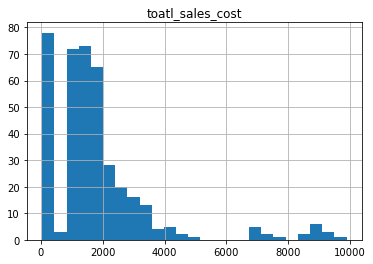

In [7]:
data_for_model.hist(column ="toatl_sales_cost", bins = 25)

In [8]:
## Checking missing values

In [9]:
data_for_model.isna().sum()

distance_from_store       2
gender                    3
credit_score              2
customer_loyalty_score    0
toatl_sales_cost          0
num_items                 0
transactions_id           0
product_area_id           0
average_basket_value      0
dtype: int64

In [10]:
data_for_model.dropna(how = "any", inplace =True)
data_for_model.isna().sum()

distance_from_store       0
gender                    0
credit_score              0
customer_loyalty_score    0
toatl_sales_cost          0
num_items                 0
transactions_id           0
product_area_id           0
average_basket_value      0
dtype: int64

In [11]:
## Correaltion Analysis
data_for_model.corr()

,distance_from_store,credit_score,customer_loyalty_score,toatl_sales_cost,num_items,transactions_id,product_area_id,average_basket_value
distance_from_store,1.000000,-0.008447,-0.443227,0.166703,0.104945,-0.055063,0.005514,0.271880
credit_score,-0.008447,1.000000,0.006972,0.026232,0.003651,-0.044406,-0.037132,0.097038
customer_loyalty_score,-0.443227,0.006972,1.000000,0.288607,0.327508,0.531013,0.352328,0.132623
toatl_sales_cost,0.166703,0.026232,0.288607,1.000000,0.939591,0.787452,0.420298,0.845948
num_items,0.104945,0.003651,0.327508,0.939591,1.000000,0.844134,0.281355,0.683717
transactions_id,-0.055063,-0.044406,0.531013,0.787452,0.844134,1.000000,0.519453,0.473463
product_area_id,0.005514,-0.037132,0.352328,0.420298,0.281355,0.519453,1.000000,0.329974
average_basket_value,0.271880,0.097038,0.132623,0.845948,0.683717,0.473463,0.329974,1.000000


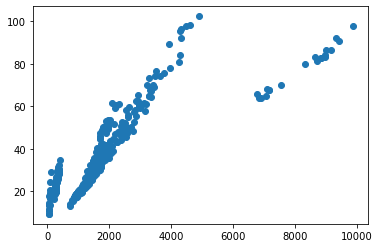

In [12]:
plt.scatter(data_for_model['toatl_sales_cost'], data_for_model['average_basket_value'])

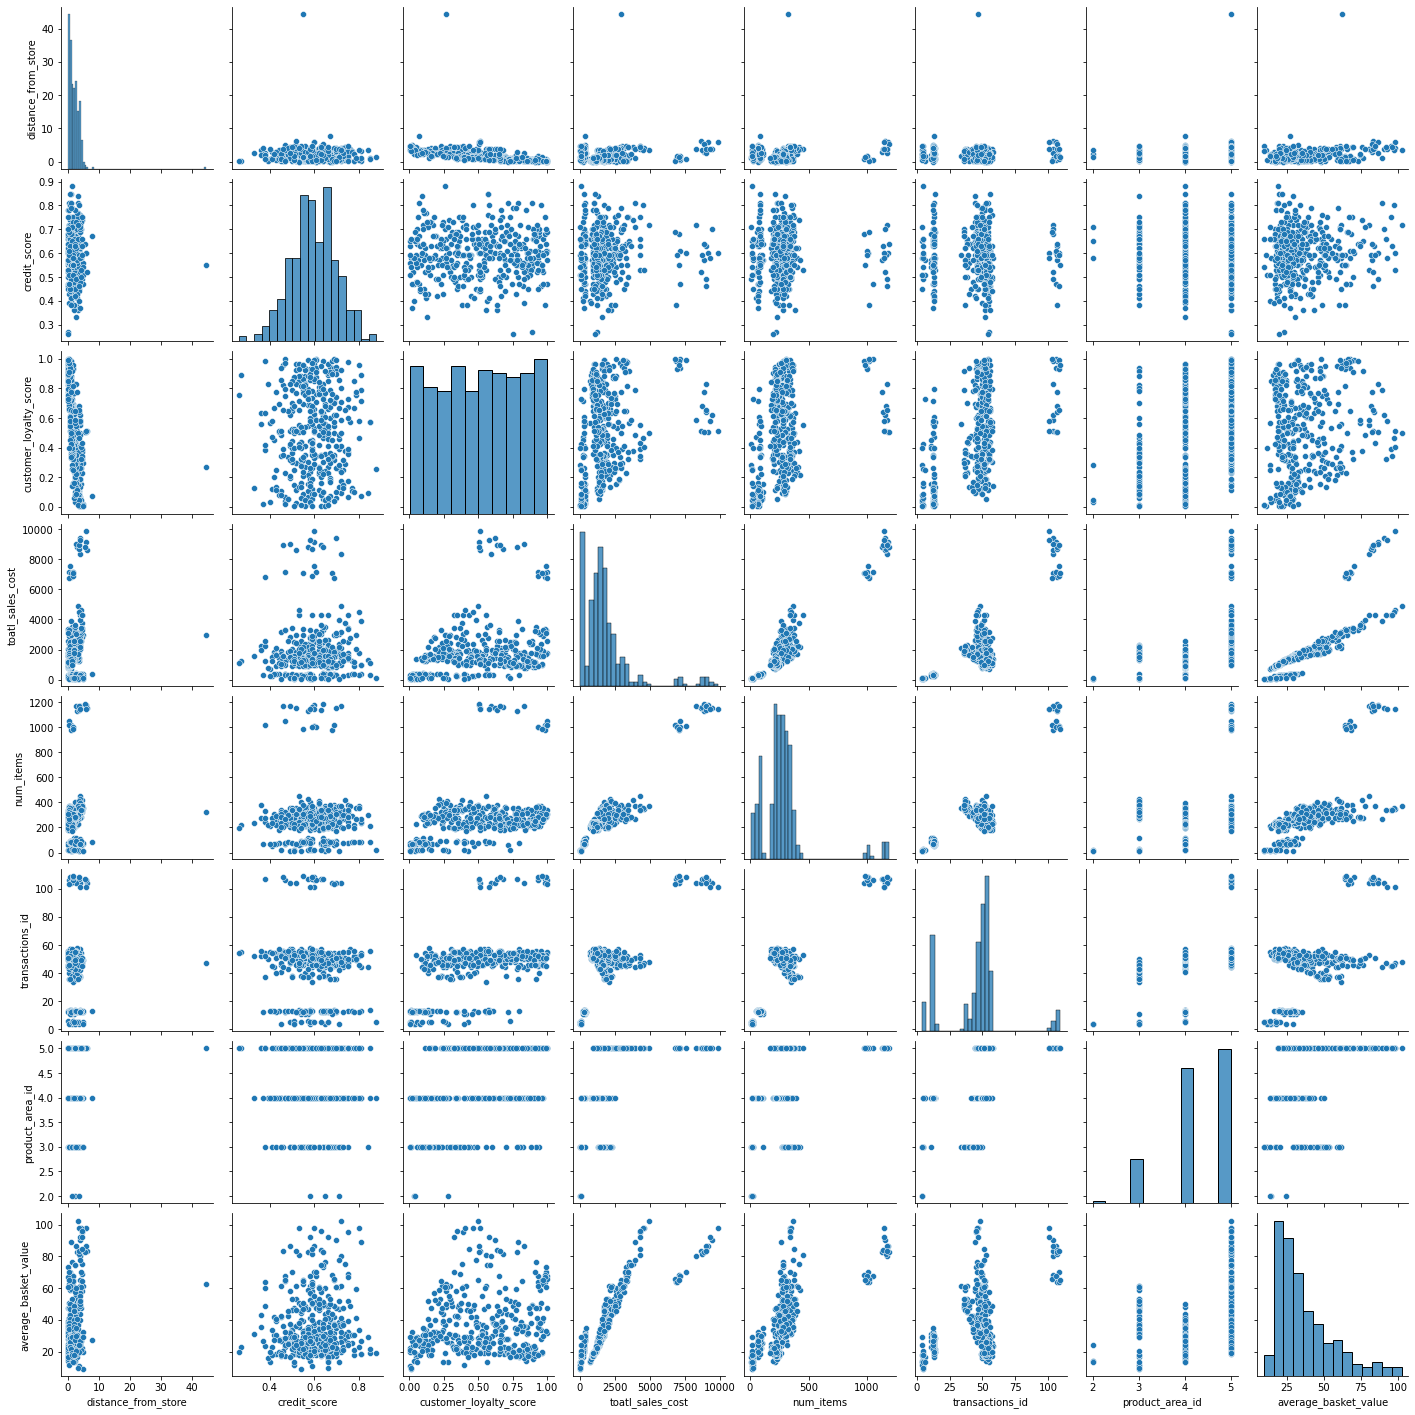

In [13]:
sns.pairplot(data_for_model)

In [14]:
## Shuffling the dataset
data_for_model = shuffle(data_for_model, random_state =42)

# Splitting the dataset in independent (x) and dependent variables (y)
# and train and test dataset

In [15]:
X = data_for_model.drop(['customer_loyalty_score'], axis =1)
y = data_for_model['customer_loyalty_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =42)

# Dealing with categorical variables

In [16]:
encoder= OneHotEncoder(sparse=False,drop= "first")
cat_vars=["gender"]
X_train_encoder=encoder.fit_transform(X_train[cat_vars])
X_test_encoder=encoder.transform(X_test[cat_vars])
feature_names= encoder.get_feature_names(cat_vars)

X_train_encoder =pd.DataFrame(X_train_encoder, columns = feature_names)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoder.reset_index(drop=True)],axis=1)
X_train.drop(cat_vars, axis =1, inplace=True)

X_test_encoder =pd.DataFrame(X_test_encoder, columns = feature_names)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoder.reset_index(drop=True)],axis=1)
X_test.drop(cat_vars, axis =1, inplace=True)
X_train.head()



,distance_from_store,credit_score,toatl_sales_cost,num_items,transactions_id,product_area_id,average_basket_value,gender_M
0,1.93,0.48,2557.03,296,56,5,45.661250,0.0
1,2.59,0.62,3001.64,285,50,5,60.032800,0.0
2,0.17,0.55,1793.41,327,46,4,38.987174,1.0
3,3.37,0.57,1470.33,287,43,3,34.193721,0.0
4,1.84,0.51,1388.55,226,54,5,25.713889,0.0


# Grid Parameters Search

In [17]:
## gscv = GridSearchCV(
    estimator = RandomForestRegressor(random_state = 42),
    param_grid= {"n_estimators": [10,50,100,200, 500],
                "max_depth":[1,2,3,4,5,6,7,8,9,10]},
    cv = 5,
    scoring ="r2",
    n_jobs =-1)

## fit_to_data = gscv.fit(X_train,y_train)

## gscv.best_params_

{'max_depth': 10, 'n_estimators': 500}

### Instantiate the model based on Grid search results

In [18]:
regressor = RandomForestRegressor(random_state =42, n_estimators = 500, max_depth =10)

## Model Training

In [19]:
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)

## K fold cross validation

In [20]:
cv = KFold(n_splits =4, shuffle =True, random_state = 42)
cv_scores= cross_val_score(regressor, X_train, y_train, cv = cv, scoring = "r2")
cv_scores.mean()

0.9258535016289755

## Prediction with test data and Checking performance

In [21]:
y_pred = regressor.predict(X_test)
r_squared = r2_score(y_pred, y_test)
print(r_squared)

0.95713787525219


In [22]:
## adjusted R square
num_data_points, num_input_vars= X_test.shape
adjusted_R_square = 1 - (1 - r_squared) * (num_data_points - 1) /(num_data_points - num_input_vars -1)
print(adjusted_R_square)

0.9522393467095831


In [23]:
mse = mean_squared_error
mse(y_test, y_pred)

0.0037212557273793388

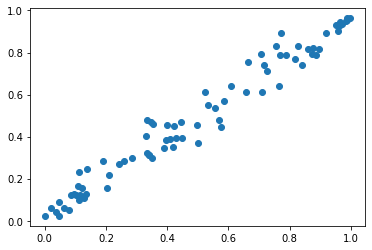

In [24]:
plt.scatter(y_test, y_pred)

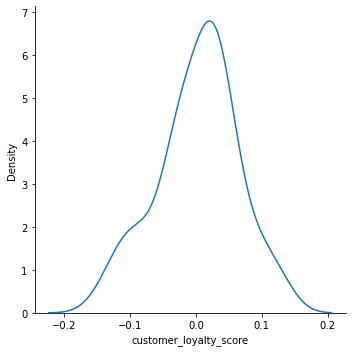

In [25]:
residuals = y_test - y_pred
sns.displot(residuals, kind ="kde" )

## Feature Importance (Permutation_Importance)

In [26]:
### Feature importance
Feature_importance=pd.DataFrame(regressor.feature_importances_)
Feature_names=pd.DataFrame(X.columns)
Feature_importance_summary = pd.concat([Feature_importance,Feature_names], axis=1)
Feature_importance_summary.columns=["Feature_impotance","input_variables"]
Feature_importance_summary.sort_values(by = "Feature_impotance", inplace= True)
Feature_importance_summary

,Feature_impotance,input_variables
1,0.010155,gender
7,0.010746,average_basket_value
6,0.013563,product_area_id
4,0.037535,num_items
5,0.043207,transactions_id
2,0.110118,credit_score
3,0.110337,toatl_sales_cost
0,0.664338,distance_from_store


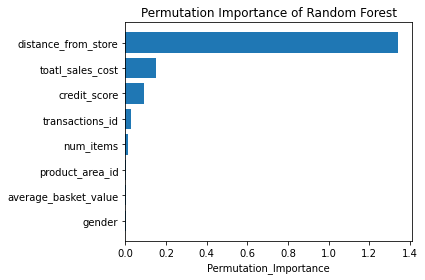

In [27]:
### Permutation importance (feature selection) ## permutation is better than former technique

result= permutation_importance(regressor, X_test, y_test, n_repeats=10, random_state=42)

permutation_importance=pd.DataFrame(result["importances_mean"])
Feature_names=pd.DataFrame(X.columns)
permutation_importance_summary = pd.concat([permutation_importance,Feature_names], axis=1)
permutation_importance_summary.columns=["permutation_importance","input_variables"]
permutation_importance_summary.sort_values(by = "permutation_importance", inplace= True)
permutation_importance_summary
plt.barh(permutation_importance_summary["input_variables"], permutation_importance_summary["permutation_importance"])
plt.title("Permutation Importance of Random Forest")
plt.xlabel("Permutation_Importance")
plt.tight_layout()
plt.show()

# Prediction on new data

In [36]:
import numpy as np
X_test = np.array(X_test)

In [39]:
X_test[0].reshape(1, -1)

array([[2.94000000e+00, 6.20000000e-01, 2.39763000e+03, 2.82000000e+02,
        5.20000000e+01, 5.00000000e+00, 4.61082692e+01, 0.00000000e+00]])

In [40]:
regressor.predict(X_test[0].reshape(1, -1))

array([0.3511188])

# Pickling the Model file for Deployment

In [41]:
pickle.dump(regressor, open('rfr_model.pkl', 'wb'))

In [42]:
pickled_model_rfr =pickle.load(open('rfr_model.pkl', 'rb'))

In [43]:
pickled_model_rfr.predict(X_test[0].reshape(1, -1))

array([0.3511188])